# Análisis de textos

In [1]:
%pip install num2words


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import num2words
import re, unicodedata, inflect
import nltk
from gensim.models import Word2Vec
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from joblib import dump, load



In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
RECALL = "Recall:"
PRECISION = "Precision:"
F1 = "F1:"

In [5]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [6]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to /home/leo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
ods_df = pd.read_csv("../data/cat_6716.csv")

In [8]:
ods_df["sdg"].value_counts(dropna=False, normalize=True)

sdg
6     0.542161
16    0.263505
7     0.194335
Name: proportion, dtype: float64

In [9]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].astype(str)

## Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

<span style="color:red">!!! Antes de ver la solución, revisa alternativas para realizar las tres etapas previas.</span>

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

### Limpieza de los datos

In [10]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words.num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### Tokenización

In [11]:
ods_df["Textos_espanol"] = ods_df["Textos_espanol"].apply(word_tokenize).apply(preprocessing).apply(" ".join)
ods_df.sample(5)

,Textos_espanol,sdg
1411,articulo pone relieve reto desigualdad medioambiental francia marco socioecologia enfoque relaciona crisis ecologicas cuestiones sociales especialmente desigualdad comienza definiendo nociones desigualdad medioambiental justicia medioambiental marco enfoque capacidad continuacion examina estudios empiricos recientes muestran contaminacion atmosferica quimica acustica acceso recursos medioambientales exposicion desastres socioecologicos estan socialmente diferenciados francia pueden entenderse segun definicion adoptada articulo forma injusticia concluye pasando revista problemas plantea desigualdad medioambiental francia explorando soluciones politicas capaces hacer frente desafio,16
657,enfoque integrado implicaciones importantes significa progreso hacia ods seis puede permitir impulsar progreso mayoria ods igualmente exito ods seis tambien dependera mayoria ods alcancen metas agua central lograr vision ambicion fundamental salud bienestar sociedad acabar hambre lograr seguridad alimentaria mejorar nutricion,6
771,ejemplo aprovechar conocimientos relacionados agua responsables politicos pueden crear sistemas informacion agua mientras resolucion conflictos asignacion recursos hidricos requiere participacion activa afectados identificar compensaciones adecuadas llegar consenso hecho setenta y tres participantes encuestados coincidieron mecanismos existentes participacion partes interesadas suficientes opiniones coincidieron herramientas logrado fomentar toma decisiones inclusiva formalmente hacer mas sistematica participacion partes interesadas informalmente proporcionar canales partes interesadas contribuyan libremente resultado demuestra todas herramientas existen estan mano trata mas hacerlas efectivas orientarlas resultados practica desarrollar nuevos instrumentos figura 54,6
912,factores influyen eleccion tecnologia densidad clientes carga distancia relativa red nacional regional paisaje disponibilidad recursos naturales viento sol agua bosques aspectos economicos financieros incluida capacidad voluntad pago consumidores disponibilidad madurez tecnologia elegida niez dos mil diez numero usuarios puede variar unico usuario sistema autonomo pueblos enteros minirredes regiones remotas escasamente pobladas bajos ingresos hacen ampliacion red economicamente inviable alternativas proporcionan acceso electricidad puede desplegarse relativa rapidez necesidad aumentar capacidad generacion,7
555,nuevamente tres instrumentos revisados capitulo representan parte minima factura agua cubierta usuarios finales probable cualquier revision instrumentos introduccion cargo extraccion provoque graves problemas asequibilidad si surgen problemas asequibilidad sistema monitoreo podrian implementar mecanismos p fondo social dedicado ayudar pobres pagar facturas agua suelen producirse nivel nacional tambien casos nivel regional,6


### Normalización

# Entrenamiento

In [12]:
# The param 'stratify' is useful to guarantee label proportions on train and test sets
X_train, X_test, y_train, y_test = train_test_split(ods_df[["Textos_espanol"]], ods_df["sdg"], test_size=0.3, stratify=ods_df["sdg"], random_state=1)

In [13]:
X_train_tokens = [nltk.word_tokenize(text) for text in X_train]
X_test_tokens = [nltk.word_tokenize(text) for text in X_test]

In [14]:
pd.Series(y_train).value_counts(normalize=True)

sdg
6     0.542373
16    0.263653
7     0.193974
Name: proportion, dtype: float64

In [15]:
pd.Series(y_test).value_counts(normalize=True)

sdg
6     0.541667
16    0.263158
7     0.195175
Name: proportion, dtype: float64

## Text vectorization

In [16]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [17]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

In [18]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [19]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

## Training a model with BoW

In [20]:
bow_model = RandomForestClassifier(random_state=2)

In [21]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

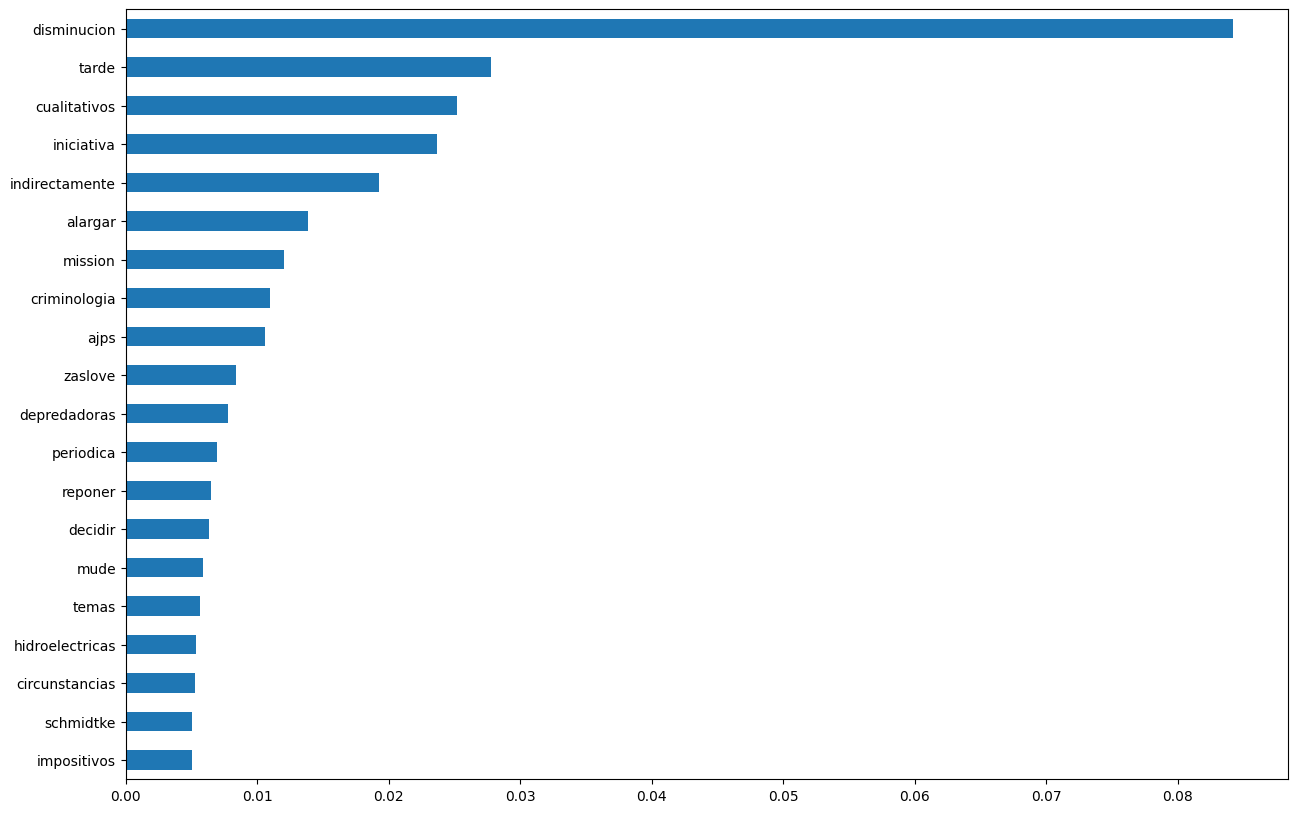

In [22]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [23]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 72.35


In [24]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

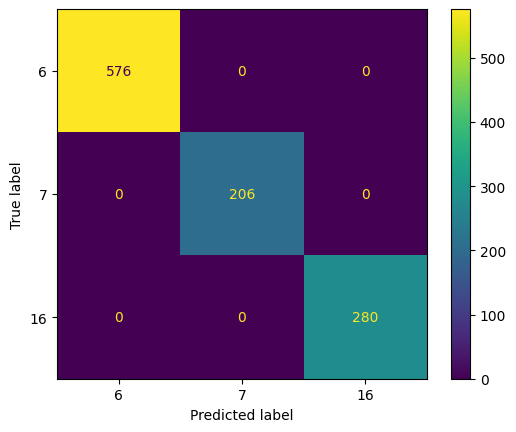

In [25]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

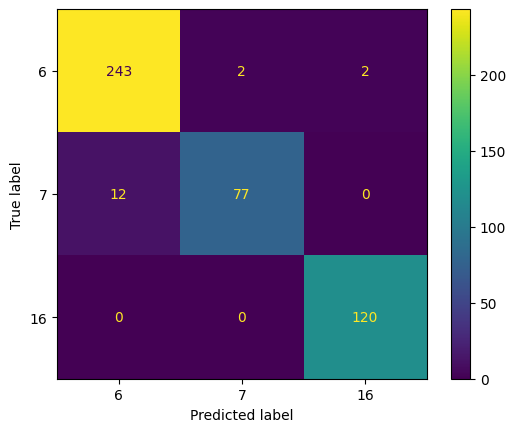

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [27]:
print(PRECISION, precision_score(y_train, y_train_bow_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_bow_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_bow_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [28]:
print(PRECISION, precision_score(y_test, y_test_bow_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_bow_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_bow_predict, average="weighted"))

Precision: 0.9652545897292087
Recall: 0.9649122807017544
F1: 0.9642962452543506


### Model selection

In [29]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4)),
])
dump(pipeline, 'pipeline.joblib')

In [30]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100], 
}


In [31]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=7, return_train_score=True, verbose=1, random_state=5)


In [32]:
search.fit(X_train["Textos_espanol"], y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...],
                                                              tokenizer=<function word_tokenize at 0x7f5ca0585580>)),
                                             ('classifier',
                                              RandomForestClassif...
                                                                                   'la',
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
                                                                                   'del',
                                                                                   'se',
                                                                                   'las',
                                                                                   'por',
                                                                                   'un',
                                                                                   'para',
                                                                                  

In [33]:
search.best_params_

{'vectorizer__lowercase': False,
 'vectorizer': CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7f5ca0585580>),
 'classifier__n_estimators': 100,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [34]:
search.best_score_

nan

In [35]:
y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])


In [36]:
print(PRECISION, precision_score(y_train, y_train_search_predict, average="weighted"))
print(RECALL, recall_score(y_train, y_train_search_predict, average="weighted"))
print(F1, f1_score(y_train, y_train_search_predict, average="weighted"))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [37]:
print(PRECISION, precision_score(y_test, y_test_search_predict, average="weighted"))
print(RECALL, recall_score(y_test, y_test_search_predict, average="weighted"))
print(F1, f1_score(y_test, y_test_search_predict, average="weighted"))

Precision: 0.9632026219707408
Recall: 0.9627192982456141
F1: 0.9621527299887555


# Predicción y guardado de data

In [38]:
ods_df_unlabeled = pd.read_csv("../data/SinEtiquetatest_cat_6716.csv")
#Predict the labels of the unlabeled data
y_unlabeled_predict = search.best_estimator_.predict(ods_df_unlabeled["Textos_espanol"])
#Add the predicted labels to the unlabeled data
ods_df_unlabeled["sdg"] = y_unlabeled_predict
#Save the labeled data
ods_df_unlabeled.to_csv("../data/Predicted.csv", index=False)
